In [546]:
#import necessary libraries
import re
import copy
import pandas as pd
import numpy as np
from matplotlib import gridspec

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

from matplotlib import font_manager as fm
fm.findfont('Helvetica Neue')

#designate which font to use. To use others just use different ttf files 
#if ttf files not already in there, may need to do fondu conversion of dfont files and move in.
font_path = '/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/HelveticaNeueThin.ttf'
font_properties = fm.FontProperties(fname=font_path)
print font_properties
mpl.rcParams['font.family'] = font_properties.get_name()

#designate some font characteristics
mpl.rcParams['font.weight']=100
mpl.rcParams['axes.labelweight']=100
mpl.rcParams['font.size']=14

import pandas as pd
import numpy as np

:family=sans-serif:style=normal:variant=normal:weight=100:stretch=normal:file=/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/HelveticaNeueThin.ttf:size=10.0


In [108]:
#import the GLM log file as a pandas dataframe.
#this file contains the pairwise transition rates (country.glmModel##) and the predictor values/indicators
glm_logfile_path = '/Users/alliblk/Desktop/gitrepos/zika-usvi/beast/prelimGLM10-24-2017/AmZika_GLMmodel.log'
glm_df = pd.read_csv(glm_logfile_path, sep='\t', comment='#')

In [109]:
#checking that thing work the way I want.
burnin = int(round(len(glm_df)*0.1))
#print glm_df['country.glmCoefficients1'][burnin:162]
#print np.mean(glm_df['country.glmCoefficients1'])

In [20]:
#make dictionary that matches rates to the name of the rate via index:
#indicators are labelled 1 through 9, but rates are labelled 0 through 1979


{1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}


In [110]:
predictor_dict = {}
counter = 0
with open('/Users/alliblk/Desktop/gitrepos/zika-usvi/data/glm/transformed-linearized-matrices/xml-formatted-predictors.txt') as file:
    for line in file:
        match = re.search('parameter id="[a-z\_]+"', line)
        if match:
            counter += 1
            predictor_name = match.group(0).replace('parameter id="', '').replace('"','').strip()
            predictor_dict[counter] = {'predictor_name': predictor_name}
            

In [111]:
print predictor_dict

{1: {'predictor_name': 'great_circle_distances'}, 2: {'predictor_name': 'per_capita_pax_volume'}, 3: {'predictor_name': 'origin_population_size'}, 4: {'predictor_name': 'destination_population_size'}, 5: {'predictor_name': 'origin_proportion_urban'}, 6: {'predictor_name': 'destination_proportion_urban'}, 7: {'predictor_name': 'origin_suitability'}, 8: {'predictor_name': 'destination_suitability'}, 9: {'predictor_name': 'north_south_predictor'}}


In [113]:
column_names = glm_df.columns.values.tolist()
for x in column_names:
    if x.startswith('country.glmCoefficients'):
        predictor_dict[int(x[-1])].update(logfile_name=x)
    elif x.startswith('country.coefIndicator'):
        predictor_dict[int(x[-1])].update(coefficient_indicator=x)
        
print predictor_dict

{1: {'predictor_name': 'great_circle_distances', 'coefficient_indicator': 'country.coefIndicator1', 'logfile_name': 'country.glmCoefficients1'}, 2: {'predictor_name': 'per_capita_pax_volume', 'coefficient_indicator': 'country.coefIndicator2', 'logfile_name': 'country.glmCoefficients2'}, 3: {'predictor_name': 'origin_population_size', 'coefficient_indicator': 'country.coefIndicator3', 'logfile_name': 'country.glmCoefficients3'}, 4: {'predictor_name': 'destination_population_size', 'coefficient_indicator': 'country.coefIndicator4', 'logfile_name': 'country.glmCoefficients4'}, 5: {'predictor_name': 'origin_proportion_urban', 'coefficient_indicator': 'country.coefIndicator5', 'logfile_name': 'country.glmCoefficients5'}, 6: {'predictor_name': 'destination_proportion_urban', 'coefficient_indicator': 'country.coefIndicator6', 'logfile_name': 'country.glmCoefficients6'}, 7: {'predictor_name': 'origin_suitability', 'coefficient_indicator': 'country.coefIndicator7', 'logfile_name': 'country.glmC

In [114]:
for key in predictor_dict.keys():
    predictor_mean = np.mean(glm_df[predictor_dict[key]['logfile_name']][burnin:len(glm_df)]) #take mean of the column, excluding burnin
    predictor_median = np.median(glm_df[predictor_dict[key]['logfile_name']][burnin:len(glm_df)])
    predictor_st_dev = np.std(glm_df[predictor_dict[key]['logfile_name']][burnin:len(glm_df)])
    
    mean_incl_prob = np.mean(glm_df[predictor_dict[key]['coefficient_indicator']][burnin:len(glm_df)])
    
    predictor_dict[key].update(coef_mean=predictor_mean)
    predictor_dict[key].update(coef_median=predictor_median)
    predictor_dict[key].update(coef_stdev=predictor_st_dev)
    predictor_dict[key].update(coef_inclusion_prob = mean_incl_prob)

In [115]:
print predictor_dict

{1: {'coefficient_indicator': 'country.coefIndicator1', 'logfile_name': 'country.glmCoefficients1', 'coef_median': -0.96646619133640832, 'predictor_name': 'great_circle_distances', 'coef_mean': -0.98007274939737099, 'coef_inclusion_prob': 1.0, 'coef_stdev': 0.12421416147860834}, 2: {'coefficient_indicator': 'country.coefIndicator2', 'logfile_name': 'country.glmCoefficients2', 'coef_median': 0.29586475588055039, 'predictor_name': 'per_capita_pax_volume', 'coef_mean': 0.30576844419877897, 'coef_inclusion_prob': 0.013698630136986301, 'coef_stdev': 1.9690676583508859}, 3: {'coefficient_indicator': 'country.coefIndicator3', 'logfile_name': 'country.glmCoefficients3', 'coef_median': -0.093099894775222514, 'predictor_name': 'origin_population_size', 'coef_mean': -0.12734153193164649, 'coef_inclusion_prob': 0.0068493150684931503, 'coef_stdev': 2.1419577779454966}, 4: {'coefficient_indicator': 'country.coefIndicator4', 'logfile_name': 'country.glmCoefficients4', 'coef_median': 0.825742870836562

In [276]:
#calculate Bayes Factors for inclusion probabilities of predictors
priorProbability = 1-(0.5**(1.0/9))
priorOdds = float(priorProbability/float(1-priorProbability))
len_mcmc = len(glm_df)-burnin #exclude burn in

#Bayes factor should be based off of the mean of the indicator value, not the coefficient value.
#This is assessing inclusion probability of the indicator.
significant_coefficients = []
for key in predictor_dict.keys():
    posteriorProbability = (predictor_dict[key]['coef_inclusion_prob'] - (1.0/len_mcmc)) # subtracting 1/len of chain is just to ensure that posterior probability does not exactly == 1.
    posteriorOdds = posteriorProbability/(1-posteriorProbability)
    predictor_dict[key].update(posterior_odds=posteriorOdds)
    
    BF = float(posteriorOdds/priorOdds)
    predictor_dict[key].update(bayes_factor=BF)
    
    if BF>3:
        significant_coefficients.append(predictor_dict[key]['logfile_name'])
    
    print predictor_dict[key]['predictor_name']
    print BF


great_circle_distances
1811.14755064
per_capita_pax_volume
0.0861425707797
origin_population_size
0.0
destination_population_size
1811.14755064
origin_proportion_urban
0.351849936988
destination_proportion_urban
2.09843302419
origin_suitability
1.53731357084
destination_suitability
-0.084970563014
north_south_predictor
0.351849936988


In [214]:
coefficients_df = glm_df.ix[:, ['country.glmCoefficients1', 'country.glmCoefficients2',
                                 'country.glmCoefficients3','country.glmCoefficients4',
                                 'country.glmCoefficients5','country.glmCoefficients6', 
                                 'country.glmCoefficients7',
                                 'country.glmCoefficients8','country.glmCoefficients9']]



significant_coefficients_df = glm_df.ix[:, ['country.glmCoefficients1','country.glmCoefficients4']]

In [288]:
stack_coefficients_df = coefficients_df.stack()
stack_coefficients_df = stack_coefficients_df.reset_index()
stack_coefficients_df.rename(columns={'level_0':'mcmc_sample','level_1':'coefficient_name', 0:'coefficient_value'}, inplace=True)

stack_signifi_coefs = significant_coefficients_df.stack()
stack_signifi_coefs = stack_signifi_coefs.reset_index()
stack_signifi_coefs.rename(columns={'level_0':'mcmc_sample','level_1':'coefficient_name', 0:'coefficient_value'}, inplace=True)

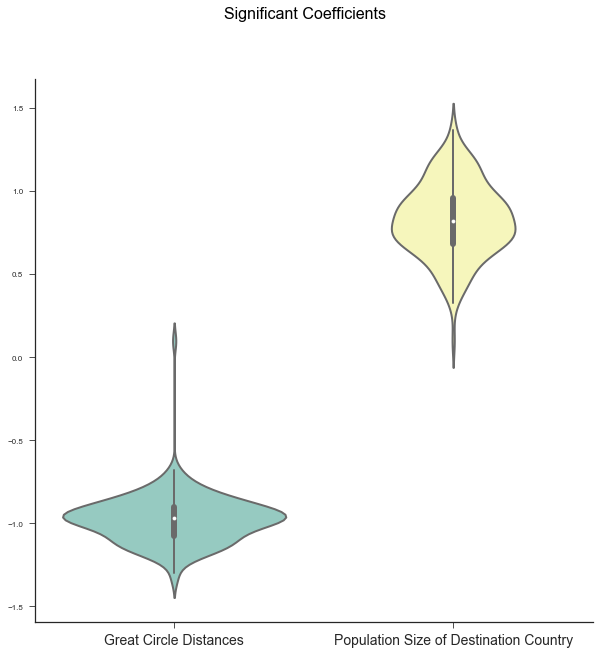

In [501]:
#stack_df.columns=['sample','coefficient_name','value']
fig,ax = plt.subplots(figsize=(10,10),facecolor='w')
sns.set_style("ticks")
ax = sns.violinplot(x="coefficient_name", y="coefficient_value", data=stack_signifi_coefs, linewidth=2, palette="Set3", orient='v')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(['Great Circle Distances', 'Population Size of Destination Country'],size =14)
fig.suptitle('Significant Coefficients', size=16, color='black')
#ax.text(0.5,2,'my plot',size=14) #add my own labeling
ax.set_xlabel('')
ax.set_ylabel('')


AttributeError: 'AxesSubplot' object has no attribute 'pivot'

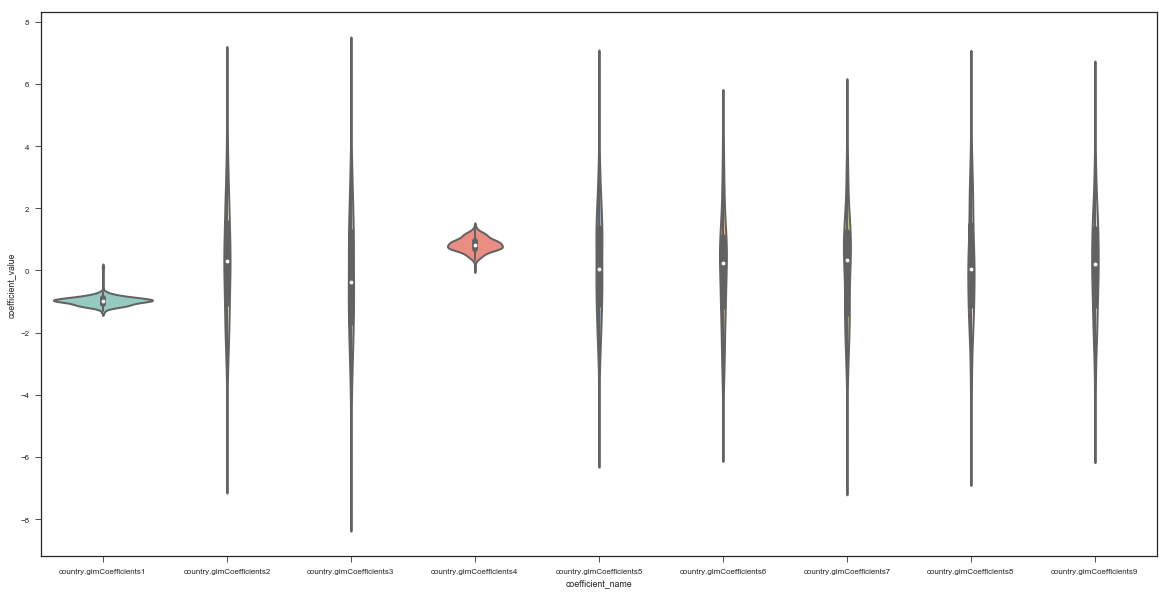

In [340]:
#stack_df.columns=['sample','coefficient_name','value']
fig,ax = plt.subplots(figsize=(20,10),facecolor='w')
sns.set_style("ticks")
ax = sns.violinplot(x="coefficient_name", y="coefficient_value", data=stack_coefficients_df, linewidth=2, palette="Set3")


In [219]:
'''import seaborn as sns
vectors = [glm_df['country.glmCoefficients1'][burnin:len(glm_df)],glm_df['country.glmCoefficients2'][burnin:len(glm_df)],glm_df['country.glmCoefficients3'][burnin:len(glm_df)]]

sns.set_style("whitegrid")
#axis1 = ax1.set_xlim(-3,3)
#axis2 = ax2.set_xlim(-6,-3)
ax = sns.violinplot(vectors, order=)

ax1 = sns.violinplot(glm_df['country.glmCoefficients1'][burnin:len(glm_df)], orient='h')
ax2 = sns.violinplot(glm_df['country.glmCoefficients2'][burnin:len(glm_df)], orient='h',color ='red')
ax3 = sns.violinplot(glm_df['country.glmCoefficients3'][burnin:len(glm_df)], orient='h',color ='blue')


#ax2.set_xlim(-3,3)
#ax3.set_xlim(2,3) '''

'import seaborn as sns\nvectors = [glm_df[\'country.glmCoefficients1\'][burnin:len(glm_df)],glm_df[\'country.glmCoefficients2\'][burnin:len(glm_df)],glm_df[\'country.glmCoefficients3\'][burnin:len(glm_df)]]\n\nsns.set_style("whitegrid")\n#axis1 = ax1.set_xlim(-3,3)\n#axis2 = ax2.set_xlim(-6,-3)\nax = sns.violinplot(vectors, order=)\n\nax1 = sns.violinplot(glm_df[\'country.glmCoefficients1\'][burnin:len(glm_df)], orient=\'h\')\nax2 = sns.violinplot(glm_df[\'country.glmCoefficients2\'][burnin:len(glm_df)], orient=\'h\',color =\'red\')\nax3 = sns.violinplot(glm_df[\'country.glmCoefficients3\'][burnin:len(glm_df)], orient=\'h\',color =\'blue\')\n\n\n#ax2.set_xlim(-3,3)\n#ax3.set_xlim(2,3) '

In [317]:
#do heat maps for the country to country rates
import ast #this will allow me to import the tuple in the file in as tuples, not as a string containing a tuple.

rates_dict= {}
with open('/Users/alliblk/Desktop/gitrepos/zika-usvi/data/glm/index-countrypair-mapping-45.tsv','rU') as file:
    for line in file:
        if line.startswith('index'):
            continue
        else:
            rates_dict[int(line.split('\t')[0])] = {'country_pair': ast.literal_eval('({})'.format(line.split('\t')[1]))}


In [339]:
print rates_dict[1979]

{'median_rate': 8.0651834823485711, 'country_pair': ('chile', 'argentina'), 'logfile_rate_name': 'country.glmModel1979', 'mean_rate': 8.4123091843950206}


In [328]:
column_names = glm_df.columns.values.tolist()
for x in column_names:
    if x.startswith('country.glmModel'):
        match = re.search('country.glmModel[0-9]+', x)
        if match:
            #print int(match.group(0).replace('country.glmModel',''))
            rates_dict[int(match.group(0).replace('country.glmModel',''))].update(logfile_rate_name=x)

In [338]:
for key in rates_dict.keys():
    rate_median = np.median(glm_df[rates_dict[key]['logfile_rate_name']][burnin:len(glm_df)]) 
    rate_mean = np.mean(glm_df[rates_dict[key]['logfile_rate_name']][burnin:len(glm_df)]) #take mean of the column, excluding burnin
    rates_dict[key].update(median_rate=rate_median)
    rates_dict[key].update(mean_rate=rate_mean)

('canada', 'united_states')
('belize', 'guatemala')
('belize', 'honduras')
('belize', 'el_salvador')
('belize', 'nicaragua')
('belize', 'cuba')
('guatemala', 'honduras')
('guatemala', 'el_salvador')
('guatemala', 'nicaragua')
('honduras', 'el_salvador')
('honduras', 'nicaragua')
('honduras', 'costa_rica')
('el_salvador', 'nicaragua')
('el_salvador', 'costa_rica')
('nicaragua', 'costa_rica')
('nicaragua', 'panama')
('nicaragua', 'colombia')
('costa_rica', 'panama')
('costa_rica', 'colombia')
('panama', 'venezuela')
('panama', 'colombia')
('panama', 'ecuador')
('bahamas', 'cuba')
('bahamas', 'haiti')
('bahamas', 'dominican_republic')
('cuba', 'jamaica')
('cuba', 'haiti')
('cuba', 'dominican_republic')
('turks_caicos_islands', 'haiti')
('turks_caicos_islands', 'dominican_republic')
('cayman_islands', 'jamaica')
('jamaica', 'haiti')
('jamaica', 'dominican_republic')
('jamaica', 'venezuela')
('jamaica', 'colombia')
('haiti', 'dominican_republic')
('haiti', 'puerto_rico')
('haiti', 'venezuel

In [384]:
countries = []
countries_to_regions = {}

with open('/Users/alliblk/Desktop/gitrepos/zika-usvi/data/glm/indexed-countries-45.tsv','r') as file:
    for line in file:
        if line.startswith('country'):
            continue
        else:
            countries.append(line.split('\t')[0])
            countries_to_regions[line.split('\t')[0]] = line.split('\t')[1].strip()
            
inversely_listed_countries = countries[::-1]

proper_country_names = {}
for country in countries:
    proper_country_names[country] = country.replace('_',' ').title()

print proper_country_names.values()

empty_array=np.zeros((len(inversely_listed_countries),len(inversely_listed_countries))) ## empty matrix
empty_array.fill(np.nan)

rates_df=pd.DataFrame(empty_array,index=inversely_listed_countries,columns=inversely_listed_countries)

#populate country pairwise dataframe with mean transition rates (these are transitions per lineage per year)
for key in rates_dict.keys():
    origin = rates_dict[key]['country_pair'][0]
    destination = rates_dict[key]['country_pair'][1]
    rates_df.loc[origin][destination] = rates_dict[key]['mean_rate']

caribbean


In [380]:
rates_df

,chile,argentina,uruguay,paraguay,brazil,bolivia,peru,ecuador,colombia,venezuela,...,costa_rica,nicaragua,el_salvador,honduras,guatemala,belize,mexico,bermuda,united_states,canada
chile,NaN,8.412309,1.969168,1.868682,3.192156,1.917297,1.937098,0.977366,1.176270,0.929244,...,0.455217,0.438254,0.424984,0.469370,0.551139,0.146780,0.986862,0.079135,1.141607,0.455610
argentina,6.188256,NaN,6.818628,3.766774,4.730240,2.162926,1.771219,0.926048,1.182548,0.984764,...,0.443196,0.423300,0.409446,0.453718,0.527243,0.142474,0.949073,0.085942,1.141905,0.464613
uruguay,3.505849,16.302217,NaN,3.565345,5.162094,1.718746,1.445925,0.800408,1.051325,0.891042,...,0.392525,0.379356,0.366390,0.408951,0.475132,0.129070,0.856040,0.078369,1.051649,0.431197
paraguay,4.240298,11.848446,4.871468,NaN,12.328969,4.384545,2.756822,1.361762,1.889509,1.743039,...,0.675704,0.597656,0.585674,0.630595,0.716212,0.194605,1.367951,0.158101,1.699855,0.704546
brazil,1.507356,3.000955,1.415888,2.461970,NaN,1.873515,1.563311,0.943496,1.417576,1.377456,...,0.490293,0.459511,0.440994,0.493547,0.558520,0.155715,1.011693,0.123122,1.341797,0.568269
bolivia,2.488522,3.793336,1.287287,2.700133,5.247383,NaN,4.364709,1.770981,2.147094,1.719365,...,0.702154,0.646852,0.606729,0.676041,0.767609,0.207599,1.277847,0.121473,1.515838,0.605079
peru,1.706488,2.098814,0.737191,1.114287,2.926988,2.896734,NaN,4.397186,3.429825,2.156399,...,1.118527,0.987324,0.906015,0.994562,1.128308,0.293880,1.730628,0.136216,1.867465,0.710529
ecuador,1.182790,1.514733,0.566137,0.794749,2.452551,1.608350,5.949816,NaN,8.083045,3.389350,...,2.383728,1.861896,1.585489,1.735123,1.882934,0.481819,2.480188,0.186816,2.534915,0.928720
colombia,0.960175,1.300364,0.502576,0.704155,2.446714,1.300793,3.094228,5.235235,NaN,8.130998,...,3.128017,2.344013,1.842306,2.166000,2.135376,0.597932,2.679299,0.259782,3.042924,1.114960
venezuela,1.028260,1.465689,0.589107,0.764618,3.098883,1.330401,2.541258,2.765835,10.289526,NaN,...,2.008134,1.730682,1.499941,1.765161,1.767493,0.523148,2.667361,0.423606,3.566160,1.380845


AttributeError: 'NoneType' object has no attribute 'set_xticks'

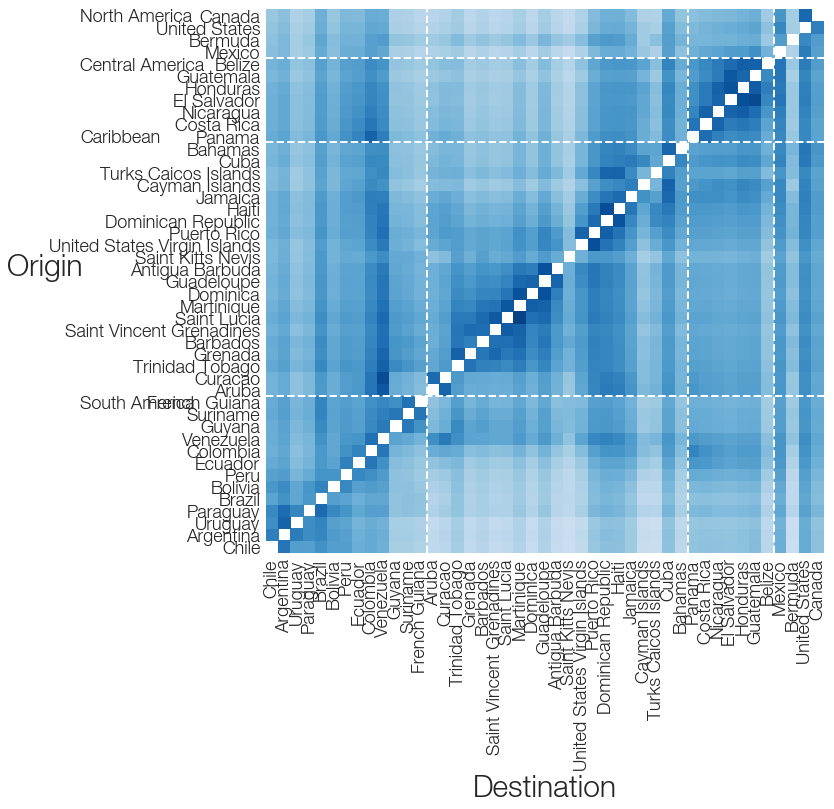

In [734]:
#set up gridded plotting space as quadrants
#need this to allow some of the additional plot customization going on the edges to denote region

fig,ax2 = plt.subplots(figsize=(10,10),facecolor='w') ## start figure
regions = ['North America', 'Central America', 'Caribbean', 'South America']

ax2.text(-15, 44, 'North America', size = 18)
ax2.text(-15, 40, 'Central America', size = 18)
ax2.text(-15, 34, 'Caribbean', size = 18)
ax2.text(-15, 12, 'South America', size = 18)
#inverse_regions = regions[::-1]

masked_array = np.ma.array(np.array(rates_df),mask=np.isnan(rates_df)) # mask NaNs (no values for origin = destination)
cmap=mpl.cm.Blues## colour map
cmap.set_bad('grey',1.)

norm=mpl.colors.LogNorm(vmin=0.01,vmax=10.0**2) ## convert to 0 1 range for coloring
heatmap = ax2.pcolor(masked_array,edgecolors='none', linewidths=0,cmap=cmap,alpha=1,norm=norm) ## heatmap

ax2.set_yticks(np.arange(0.5,len(inversely_listed_countries)+0.5))
ax2.set_yticklabels(proper_country_names[country] for country in inversely_listed_countries)

ax2.set_xticks(np.arange(0.5,len(inversely_listed_countries)+0.5))
ax2.set_xticklabels((proper_country_names[country] for country in inversely_listed_countries),rotation=90)

ax2.set_xlabel('Destination',size=30)
ax2.set_ylabel('Origin',size=30, rotation=0)
ax2.tick_params(size=0,labelsize=18)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

#make dashed lines to distinguish regions: north am, south am, central am, and caribbean.
region_counter = 0
for i in range(len(inversely_listed_countries)-1):
    country = inversely_listed_countries[i]
    next_country = inversely_listed_countries[i+1]
    if countries_to_regions[country]!=countries_to_regions[next_country]:
        ax2.axhline(i+1,ls='--',color='white', linewidth = 2) ## delimit countries on x and y axes
        ax2.axvline(i+1,ls='--',color='white', linewidth = 2)

#ax.plot([x,x],[k.children[0].y,k.children[1].y],lw=branchWidth,color=color,ls='-',zorder=9)
#ax.plot([-0.5,-0.5],[41,45], linewidth = 5, color = 'grey')
#ax.axhspan(xmin=0, xmax=5, ymin=-5, ymax=-4, facecolor='g', alpha=0.5)

#ax.add_patch(plt.Rectangle((0,41), width=1, height=5, facecolor='g'))

#can screen out portions of the plot with this if wanting to make certain rates more apparent
#[ax.axvspan(x,x+1,facecolor='black', alpha=0.6) for x in range(0,45) if x < 41]
#[ax.axhspan(x,x+1,facecolor='black', alpha=0.6) for x in range(0,45) if x <34 or x >40]

#ax = plt.subplot(gs[1])
#ax = plt.subplots(gs[1],figsize=(20,20),facecolor='w') ## start figure

#ax = plt.subplot(gs[1])
#ax2 = plt.subplot(gs[1])
#ax3 = plt.subplot(gs[2])
#ax4 = plt.subplot(gs[3])


#add color bar so I know how colors map to rates.
axcb = fig.add_axes([0.93, 0.15, 0.02, 0.6], frame_on=False) ## colour bar
mpl.colorbar.ColorbarBase(axcb,cmap=cmap,norm=norm,orientation='vertical',alpha=1.0,drawedges=False)


In [778]:
proper_country_names = {}
for country in countries:
    proper_country_names[country] = country.replace('_',' ').title().replace('Saint', 'St.').replace('United States','U.S.')

print proper_country_names.values()

['Jamaica', 'Honduras', 'Colombia', 'Mexico', 'St. Kitts Nevis', 'U.S.', 'St. Vincent Grenadines', 'Paraguay', 'Nicaragua', 'Barbados', 'Canada', 'U.S. Virgin Islands', 'Martinique', 'Peru', 'Curacao', 'Panama', 'Uruguay', 'Bahamas', 'Bermuda', 'Aruba', 'Suriname', 'Costa Rica', 'Bolivia', 'Venezuela', 'French Guiana', 'Cayman Islands', 'Brazil', 'Trinidad Tobago', 'Dominican Republic', 'Cuba', 'Guatemala', 'Chile', 'Turks Caicos Islands', 'Haiti', 'Belize', 'Argentina', 'Dominica', 'St. Lucia', 'El Salvador', 'Puerto Rico', 'Ecuador', 'Guyana', 'Grenada', 'Guadeloupe', 'Antigua Barbuda']


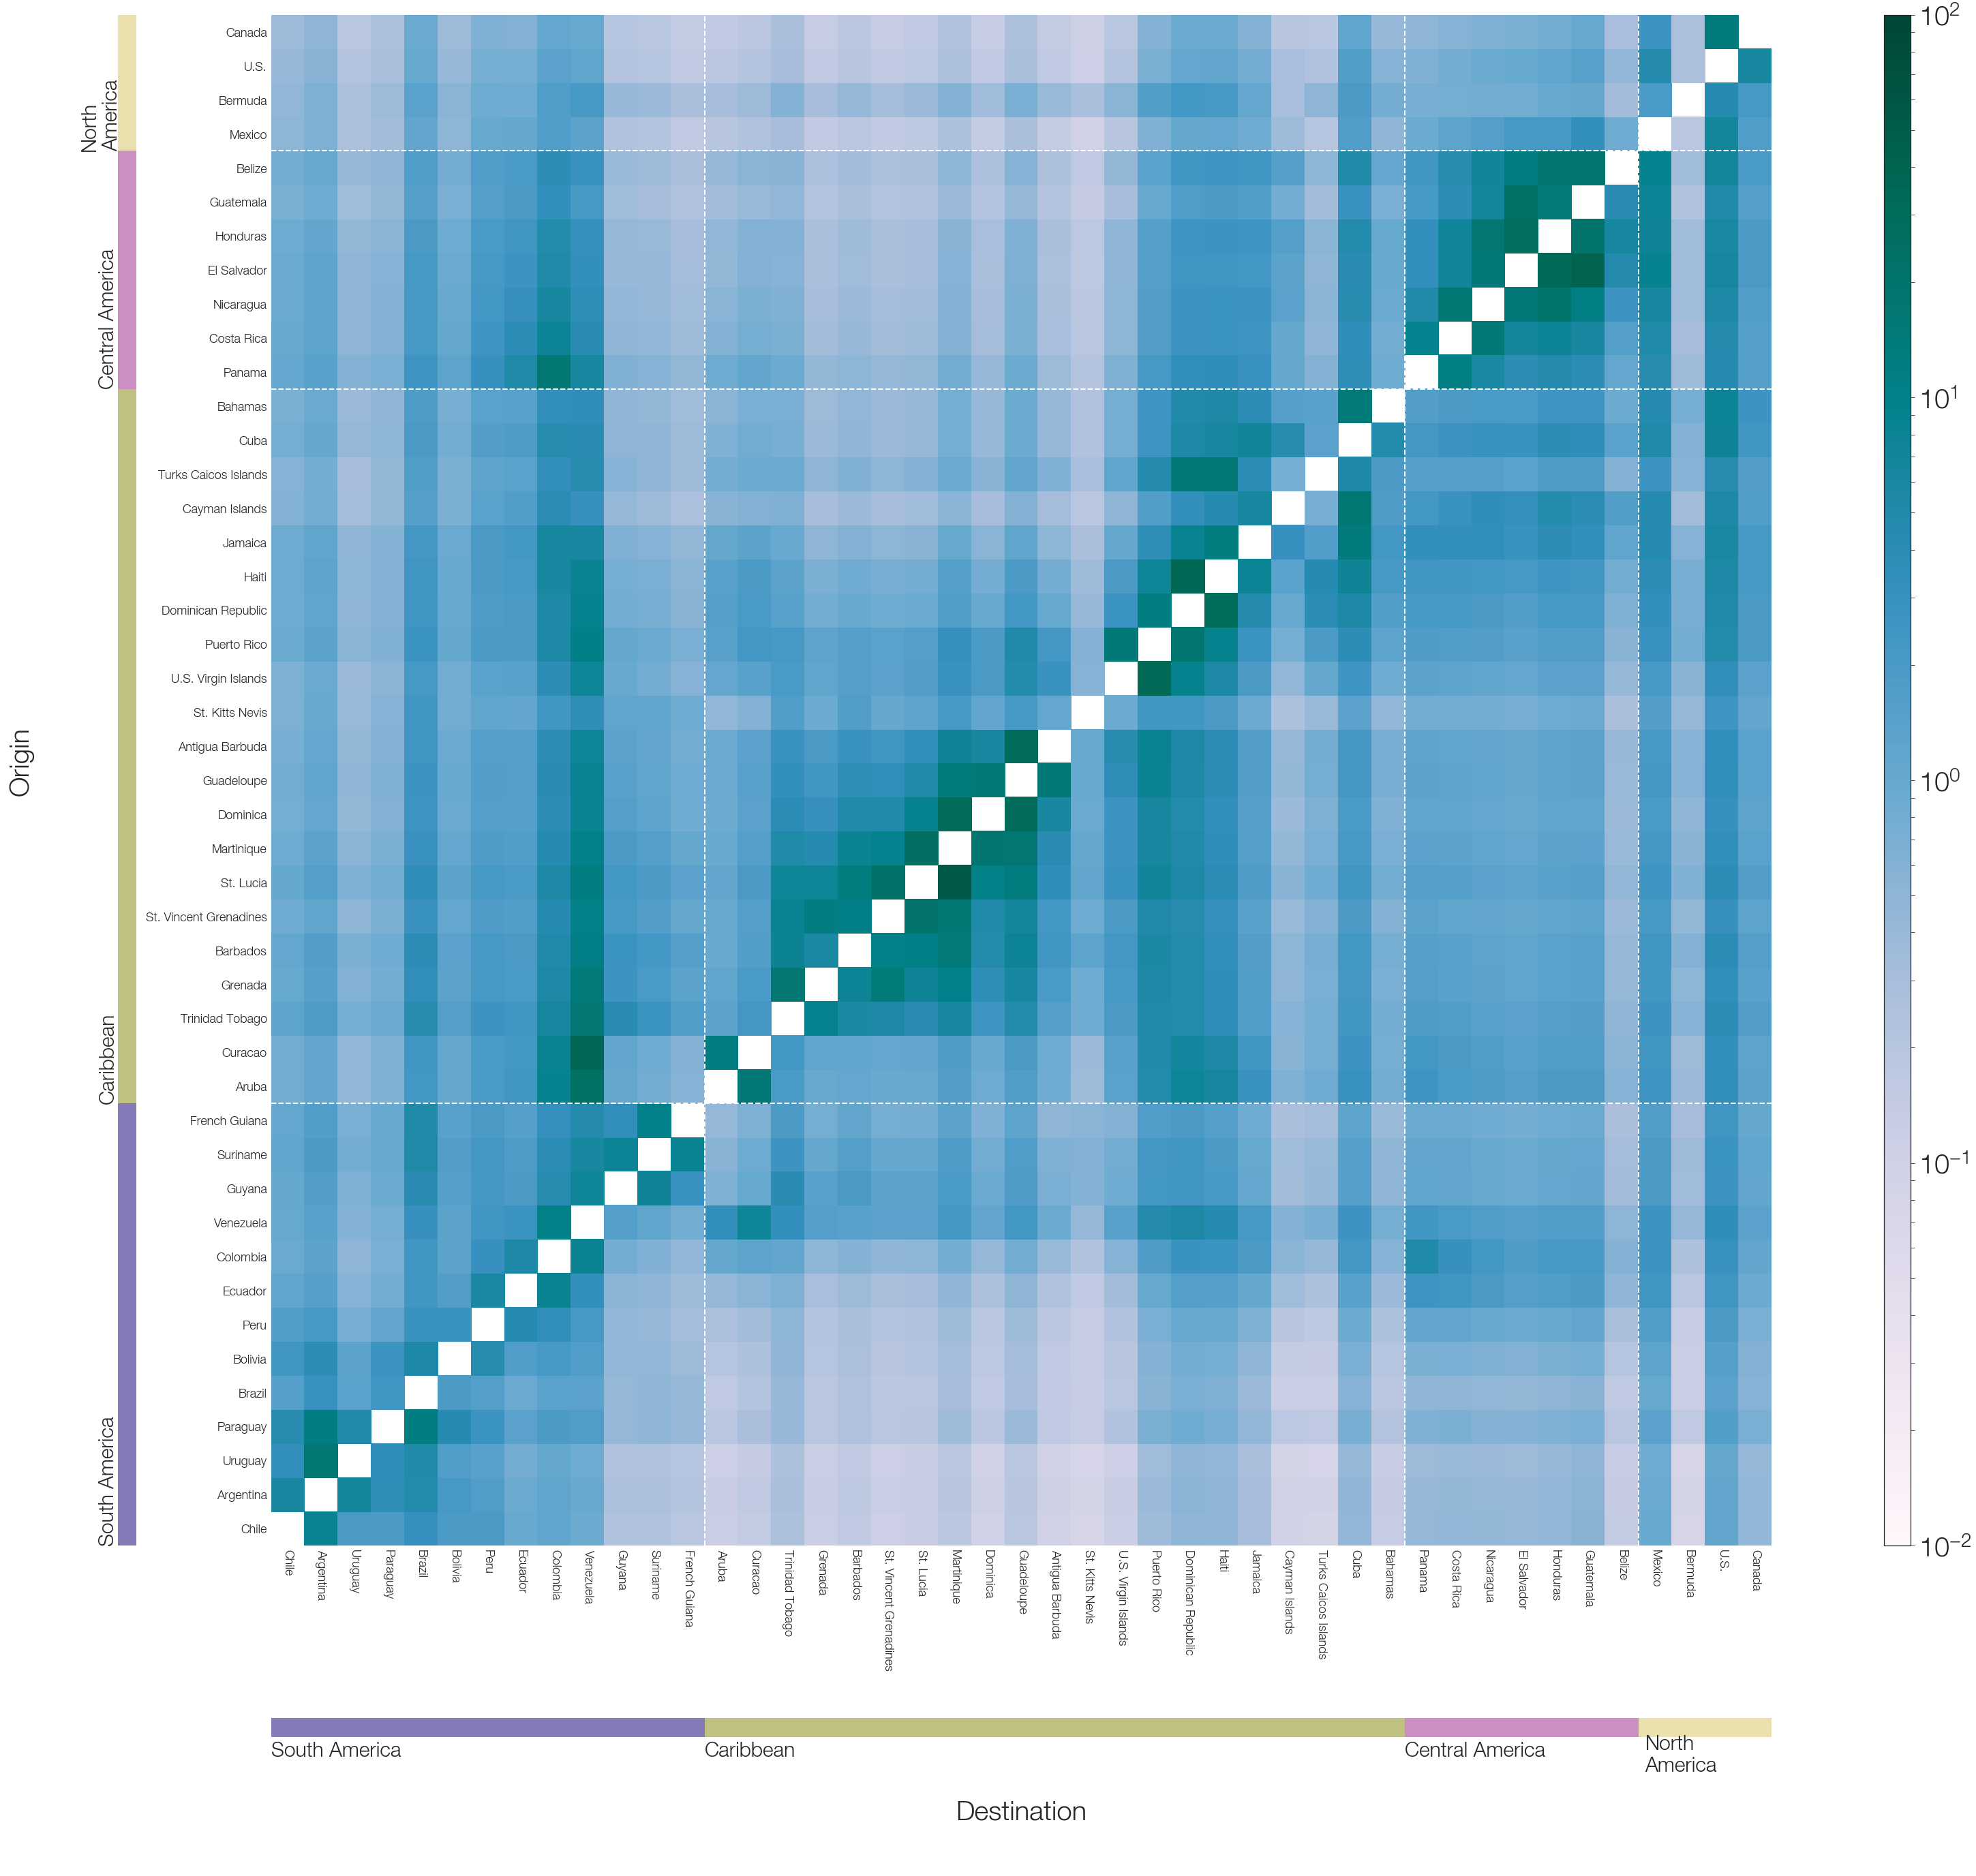

In [781]:
gs = gridspec.GridSpec(2, 3, width_ratios=[0.5, 5, 0.09], height_ratios=[5, 0.5])

fig = plt.subplots(figsize=(50,50),facecolor='w')

northAmcolor = '#ddcc77'#'#44AA99'
southAmcolor =  '#332288'#'#CC6677'
centralAmcolor = '#AA4499'
caribColor = '#999933'

#Top Left plot of figure (tall and narrow)
ax1 = plt.subplot(gs[0])
ax1.set_xlim([-2, 2])
ax1.set_ylim([0, len(countries)])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.text(-0.1, 41, 'North\nAmerica', size = 30, rotation=90, verticalalignment='bottom')
ax1.text(0.4, 34, 'Central America', size = 30,rotation=90, verticalalignment='bottom')
ax1.text(0.4, 13, 'Caribbean', size = 30,rotation=90, verticalalignment='bottom')
ax1.text(0.4, 0, 'South America', size = 30,rotation=90, verticalalignment='bottom')

ax1.add_patch(plt.Rectangle((0.9,0), width=0.5, height=13, facecolor=southAmcolor, alpha=0.6)) #south america country grouping
ax1.add_patch(plt.Rectangle((0.9,13), width=0.5, height=21, facecolor=caribColor, alpha=0.6)) #south america country grouping
ax1.add_patch(plt.Rectangle((0.9,34), width=0.5, height=7, facecolor=centralAmcolor, alpha=0.6)) #south america country grouping
ax1.add_patch(plt.Rectangle((0.9,41), width=0.5, height=4, facecolor=northAmcolor, alpha=0.6)) #south america country grouping

ax1.text(-2, 23.5, 'Origin', size = 40, rotation=90) #this is actually the y axis legend for the heat map, but it looks better if plotted here.

#HEAT MAP
ax2 = plt.subplot(gs[1],facecolor='w')
#regions = ['North America', 'Central America', 'Caribbean', 'South America']
#inverse_regions = regions[::-1]

masked_array = np.ma.array(np.array(rates_df),mask=np.isnan(rates_df)) # mask NaNs (no values for origin = destination)
cmap=mpl.cm.PuBuGn## colour map
cmap.set_bad('grey',1.)

norm=mpl.colors.LogNorm(vmin=0.01,vmax=10.0**2) ## convert to 0 1 range for coloring
heatmap = ax2.pcolor(masked_array,edgecolors='none', linewidths=0,cmap=cmap,alpha=1,norm=norm) ## heatmap

ax2.set_yticks(np.arange(0.5,len(inversely_listed_countries)+0.5))
ax2.set_yticklabels((proper_country_names[country] for country in inversely_listed_countries), size=45)

ax2.set_xticks(np.arange(0.5,len(inversely_listed_countries)+0.5))
ax2.set_xticklabels((proper_country_names[country] for country in inversely_listed_countries),rotation=270, size=45)

#ax2.set_xlabel('Destination',size=30)
#ax2.set_ylabel('Origin',size=30, rotation=0)
ax2.tick_params(size=0,labelsize=18)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

#make dashed lines to distinguish regions: north am, south am, central am, and caribbean.
region_counter = 0
for i in range(len(inversely_listed_countries)-1):
    country = inversely_listed_countries[i]
    next_country = inversely_listed_countries[i+1]
    if countries_to_regions[country]!=countries_to_regions[next_country]:
        ax2.axhline(i+1,ls='--',color='white', linewidth = 2) ## delimit countries on x and y axes
        ax2.axvline(i+1,ls='--',color='white', linewidth = 2)


ax3 = plt.subplot(gs[3])
ax3.set_xticks([])
ax3.set_yticks([])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

ax4 = plt.subplot(gs[4])
ax4.set_xlim([0, len(countries)])
ax4.set_ylim([-2, 2])
ax4.set_xticks([])
ax4.set_yticks([])
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)

ax4.text(41.2, 0.5, 'North\nAmerica', size = 30, horizontalalignment='left')
ax4.text(34, 0.9, 'Central America', size = 30, horizontalalignment='left')
ax4.text(13, 0.9, 'Caribbean', size = 30, horizontalalignment='left')
ax4.text(0, 0.9, 'South America', size = 30, horizontalalignment='left')

ax4.add_patch(plt.Rectangle((0,1.4), width=13, height=0.5, facecolor=southAmcolor, alpha=0.6)) 
ax4.add_patch(plt.Rectangle((13,1.4), width=21, height=0.5, facecolor=caribColor, alpha=0.6)) 
ax4.add_patch(plt.Rectangle((34,1.4), width=7, height=0.5, facecolor=centralAmcolor, alpha=0.6)) 
ax4.add_patch(plt.Rectangle((41,1.4), width=4, height=0.5, facecolor=northAmcolor, alpha=0.6))

ax4.text(22.5, -0.75, 'Destination', size = 40, horizontalalignment='center') #this is actually the y axis legend for the heat map, but it looks better if plotted here.

#add color bar so I know how colors map to rates.
ax5 = plt.subplot(gs[2])
cb = mpl.colorbar.ColorbarBase(ax5,cmap=cmap, norm=norm ,orientation='vertical',alpha=1.0,drawedges=False)        
cb = ax5.tick_params(labelsize=40)      
        